## Chapter 6 - Exercise 1: Trực quan hóa dữ liệu Chipotle

### Cho dữ liệu 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

Nhà hàng Chipotle cần phân tích dữ liệu bán được trong ngày diễn ra khuyến mãi để có thể điều chỉnh thực đơn và thực hiện các chương trình khuyến mãi phù hợp. 

Dữ liệu được cung cấp trong file chipotle.tsv, hãy thực hiện các yêu cầu sau và đối chiếu với kết quả.

Lưu ý:
1. Để tạo một dictionary với key là item_name và value là tần suất xuất hiện của item_name, sử dụng: <span style="color:blue">collections.Counter(biến_chứa_các_item_name)</span>
2. Chuyển dictionary thành dataframe: <span style="color:blue">pd.DataFrame.from_dict(dictionary, orient='index')</span>

In [1]:
import pandas as pd
import collections
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
# Câu 1: Đọc dữ liệu và gán vào biến chipo. Hiển thị 10 dòng đầu của dữ liệu
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'  
chipo = pd.read_csv(url, sep = '\t')
chipo.head(10)
#chipo.describe()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
  
<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>order_id</th>
      <th>quantity</th>
      <th>item_name</th>
      <th>choice_description</th>
      <th>item_price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>1</td>
      <td>Chips and Fresh Tomato Salsa</td>
      <td>NaN</td>
      <td>&#36;2.39</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>1</td>
      <td>Izze</td>
      <td>[Clementine]</td>
      <td>&#36;3.39</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>1</td>
      <td>Nantucket Nectar</td>
      <td>[Apple]</td>
      <td>&#36;3.39</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>1</td>
      <td>Chips and Tomatillo-Green Chili Salsa</td>
      <td>NaN</td>
      <td>&#36;2.39</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2</td>
      <td>2</td>
      <td>Chicken Bowl</td>
      <td>[Tomatillo-Red Chili Salsa (Hot), [Black Beans...</td>
      <td>&#36;16.98</td>
    </tr>
    <tr>
      <th>5</th>
      <td>3</td>
      <td>1</td>
      <td>Chicken Bowl</td>
      <td>[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...</td>
      <td>&#36;10.98</td>
    </tr>
    <tr>
      <th>6</th>
      <td>3</td>
      <td>1</td>
      <td>Side of Chips</td>
      <td>NaN</td>
      <td>&#36;1.69</td>
    </tr>
    <tr>
      <th>7</th>
      <td>4</td>
      <td>1</td>
      <td>Steak Burrito</td>
      <td>[Tomatillo Red Chili Salsa, [Fajita Vegetables...</td>
      <td>&#36;11.75</td>
    </tr>
    <tr>
      <th>8</th>
      <td>4</td>
      <td>1</td>
      <td>Steak Soft Tacos</td>
      <td>[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...</td>
      <td>&#36;9.25</td>
    </tr>
    <tr>
      <th>9</th>
      <td>5</td>
      <td>1</td>
      <td>Steak Burrito</td>
      <td>[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...</td>
      <td>&#36;9.25</td>
    </tr>
  </tbody>
</table>
</div>

</details>

In [3]:
# Câu 2: 
# Tạo biến x chứa các item_name là các món ăn được KH gọi , in head của x
x = chipo.item_name
print(x.head())

# Tạo một dictionary với 2 thông tin: tên món ăn (item_name)  và tần suất/số lần gọi món 
# gợi ý: Sử dụng collections.Counter(x) với key là item_name và value là tần suất xuất hiện của item_name, in kết quả
letter_counts = collections.Counter(x)
print(letter_counts)

0             Chips and Fresh Tomato Salsa
1                                     Izze
2                         Nantucket Nectar
3    Chips and Tomatillo-Green Chili Salsa
4                             Chicken Bowl
Name: item_name, dtype: object
Counter({'Chicken Bowl': 726, 'Chicken Burrito': 553, 'Chips and Guacamole': 479, 'Steak Burrito': 368, 'Canned Soft Drink': 301, 'Chips': 211, 'Steak Bowl': 211, 'Bottled Water': 162, 'Chicken Soft Tacos': 115, 'Chips and Fresh Tomato Salsa': 110, 'Chicken Salad Bowl': 110, 'Canned Soda': 104, 'Side of Chips': 101, 'Veggie Burrito': 95, 'Barbacoa Burrito': 91, 'Veggie Bowl': 85, 'Carnitas Bowl': 68, 'Barbacoa Bowl': 66, 'Carnitas Burrito': 59, 'Steak Soft Tacos': 55, '6 Pack Soft Drink': 54, 'Chips and Tomatillo Red Chili Salsa': 48, 'Chicken Crispy Tacos': 47, 'Chips and Tomatillo Green Chili Salsa': 43, 'Carnitas Soft Tacos': 40, 'Steak Crispy Tacos': 35, 'Chips and Tomatillo-Green Chili Salsa': 31, 'Steak Salad Bowl': 29, 'Nantucket Nectar'

<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
  
<pre>0             Chips and Fresh Tomato Salsa
1                                     Izze
2                         Nantucket Nectar
3    Chips and Tomatillo-Green Chili Salsa
4                             Chicken Bowl
Name: item_name, dtype: object

Counter({'Chicken Bowl': 726, 'Chicken Burrito': 553, 'Chips and Guacamole': 479, 'Steak Burrito': 368, 'Canned Soft Drink': 301, 'Chips': 211, 'Steak Bowl': 211, 'Bottled Water': 162, 'Chicken Soft Tacos': 115, 'Chips and Fresh Tomato Salsa': 110, 'Chicken Salad Bowl': 110, 'Canned Soda': 104, 'Side of Chips': 101, 'Veggie Burrito': 95, 'Barbacoa Burrito': 91, 'Veggie Bowl': 85, 'Carnitas Bowl': 68, 'Barbacoa Bowl': 66, 'Carnitas Burrito': 59, 'Steak Soft Tacos': 55, '6 Pack Soft Drink': 54, 'Chips and Tomatillo Red Chili Salsa': 48, 'Chicken Crispy Tacos': 47, 'Chips and Tomatillo Green Chili Salsa': 43, 'Carnitas Soft Tacos': 40, 'Steak Crispy Tacos': 35, 'Chips and Tomatillo-Green Chili Salsa': 31, 'Steak Salad Bowl': 29, 'Nantucket Nectar': 27, 'Barbacoa Soft Tacos': 25, 'Chips and Roasted Chili Corn Salsa': 22, 'Izze': 20, 'Chips and Tomatillo-Red Chili Salsa': 20, 'Veggie Salad Bowl': 18, 'Chips and Roasted Chili-Corn Salsa': 18, 'Barbacoa Crispy Tacos': 11, 'Barbacoa Salad Bowl': 10, 'Chicken Salad': 9, 'Carnitas Crispy Tacos': 7, 'Veggie Soft Tacos': 7, 'Burrito': 6, 'Carnitas Salad Bowl': 6, 'Veggie Salad': 6, 'Steak Salad': 4, 'Bowl': 2, 'Crispy Tacos': 2, 'Salad': 2, 'Chips and Mild Fresh Tomato Salsa': 1, 'Veggie Crispy Tacos': 1, 'Carnitas Salad': 1})
</pre>

</details>

In [4]:
# Câu 3: 
# Chuyển dictionary câu 2 thành DataFrame df để chuẩn bị cho các yêu cầu phân tích sau đó
df = pd.DataFrame.from_dict(letter_counts, orient='index')
print(df.head())

                                         0
Chips and Fresh Tomato Salsa           110
Izze                                    20
Nantucket Nectar                        27
Chips and Tomatillo-Green Chili Salsa   31
Chicken Bowl                           726


<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
  
<pre>                                         0
Chips and Fresh Tomato Salsa           110
Izze                                    20
Nantucket Nectar                        27
Chips and Tomatillo-Green Chili Salsa   31
Chicken Bowl                           726
</pre>

</details>

In [5]:
# Câu 4:
# a) Sắp xếp df theo tần suất giảm dần, và lấy 5 item đầu tiên
df_5 = df.sort_values(by = 0, ascending = False)[0:5]
df_5

,0
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479
Steak Burrito,368
Canned Soft Drink,301


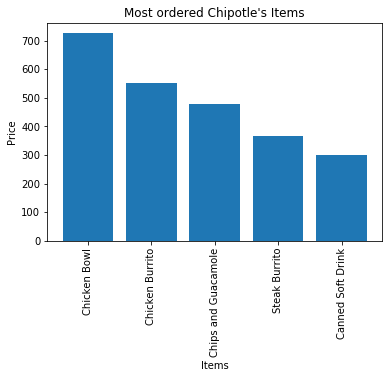

In [6]:
# b) Vẽ biểu đồ khối  với 5 item này cho biết 5 món được gọi nhiều nhất (có title xlabel, ylabel và xsticks)

# Tạo plot
plt.bar(df_5.index.values, df_5[0].values)

# Thiết lập title và labels, xsticks (rotation='vertical')
plt.xlabel('Items')
plt.ylabel('Price')
plt.title('Most ordered Chipotle\'s Items')
plt.xticks(df_5.index.values, df_5.index.values, rotation='vertical')

# Hiển thị biểu đồ
plt.show()

<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
  <div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Chicken Bowl</th>
      <td>726</td>
    </tr>
    <tr>
      <th>Chicken Burrito</th>
      <td>553</td>
    </tr>
    <tr>
      <th>Chips and Guacamole</th>
      <td>479</td>
    </tr>
    <tr>
      <th>Steak Burrito</th>
      <td>368</td>
    </tr>
    <tr>
      <th>Canned Soft Drink</th>
      <td>301</td>
    </tr>
  </tbody>
</table>
</div>

<div class="output_subarea output_png"><img src="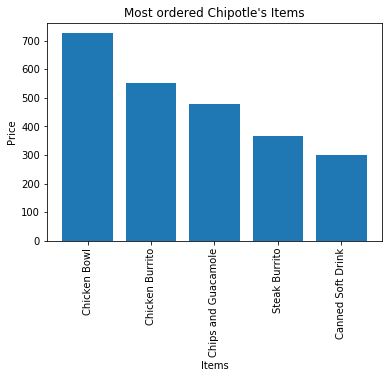
"></div>

</details>

In [7]:
# Câu 5: 
# a) Cập nhật lại cột item_price với đơn giá là số thực. 
chipo.item_price = [float(value[1:-1]) for value in chipo.item_price] 
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
  
<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>order_id</th>
      <th>quantity</th>
      <th>item_name</th>
      <th>choice_description</th>
      <th>item_price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>1</td>
      <td>Chips and Fresh Tomato Salsa</td>
      <td>NaN</td>
      <td>2.39</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>1</td>
      <td>Izze</td>
      <td>[Clementine]</td>
      <td>3.39</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>1</td>
      <td>Nantucket Nectar</td>
      <td>[Apple]</td>
      <td>3.39</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>1</td>
      <td>Chips and Tomatillo-Green Chili Salsa</td>
      <td>NaN</td>
      <td>2.39</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2</td>
      <td>2</td>
      <td>Chicken Bowl</td>
      <td>[Tomatillo-Red Chili Salsa (Hot), [Black Beans...</td>
      <td>16.98</td>
    </tr>
  </tbody>
</table>
</div>

</details>

In [11]:
# b) Nhóm các đơn hàng theo order_id, và tính tổng số lượng gọi và tổng giá trị của mỗi đơn hàng, in kết quả
orders = chipo.groupby('order_id').sum()
orders.head()

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70


<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
  
<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantity</th>
      <th>item_price</th>
    </tr>
    <tr>
      <th>order_id</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>4</td>
      <td>11.56</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2</td>
      <td>16.98</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2</td>
      <td>12.67</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2</td>
      <td>21.00</td>
    </tr>
    <tr>
      <th>5</th>
      <td>2</td>
      <td>13.70</td>
    </tr>
  </tbody>
</table>
</div>

</details>

(0, 36.7178857951459)

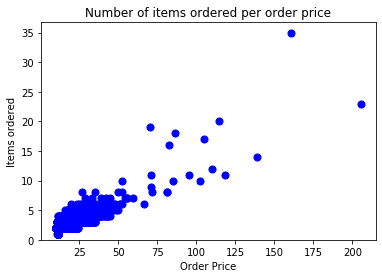

In [9]:
# Câu 6: Vẽ scatterplot của orders với x là orders.item_price, và y là orders.quantity có title xlabel, ylabel
# Bạn có nhận xét gì qua biểu đồ này 
plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'blue')

# Thiết lập title và labels
plt.xlabel('Bill Total')
plt.ylabel('Items ordered')
plt.title('Number of items ordered vs bill total')
plt.ylim(0)

<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
<pre>(0, 36.7178857951459)</pre>
    
<div class="output_subarea output_png"><img src="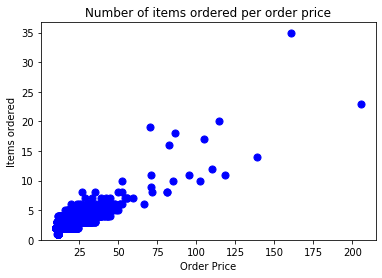
"></div>

</details>